<a href="https://colab.research.google.com/github/emm-gl/MNA_Referenz/blob/main/Notebook_01_A01320739.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ACTIVIDAD SEMANAL 7 -- REGRESIONES Y K MEANS
##NOTEBOOK 1 - REGRESIÓN SIMPLE

###Emmanuel González Calitl

###A01320739



Materia: Ciencia y Analítica de Datos 

Profesora titular: Doc. María de la Paz Rico Fernández

Profesor tutor: Orlando Figón Cruz 

Fecha de entrega: 09 de Noviembre de 2022 

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [89]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [90]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

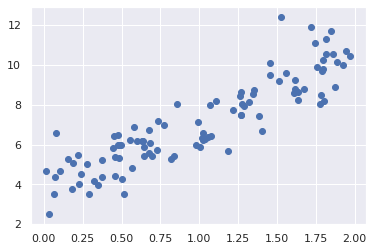

In [91]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [92]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [93]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [94]:
#X_fit[]

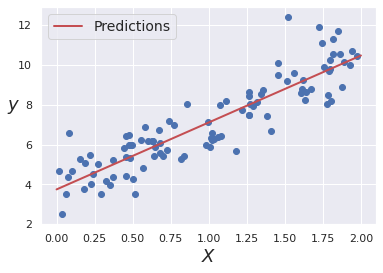

In [95]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [96]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [97]:
X_new.shape

(2, 1)

In [98]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [99]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [100]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression


If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [101]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

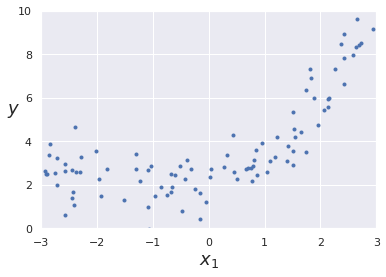

In [102]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [103]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [104]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [105]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [106]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [107]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [108]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

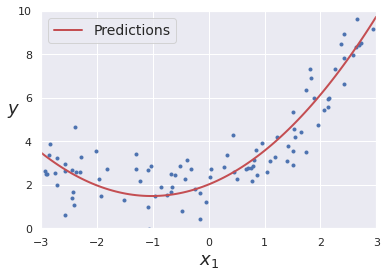

In [109]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

#R Square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


#Ejercicio 1. Costo en la industria de manufactura.

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [110]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [111]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [112]:
len(X)

1000

In [113]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

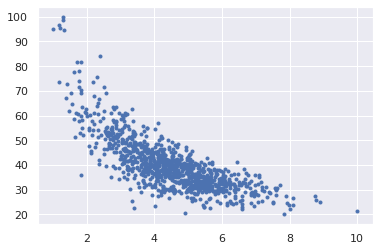

In [114]:
plt.plot(X,y,'b.')

In [115]:
#lineal

###1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [117]:
X_train.shape

(800, 1)

###2. Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [118]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

y_pred_test = lr.predict(X_test)
print("De la ecuación y = mx + b")
print("El coeficiente m:", lr.coef_)
print("El término independiente 'b' es:", lr.intercept_)

m = lr.coef_
b = lr.intercept_
print("La ecuación del modelo generado es: y =", m,"x +", b) 

De la ecuación y = mx + b
El coeficiente m: [-5.97912772]
El término independiente 'b' es: 66.79997932683362
La ecuación del modelo generado es: y = [-5.97912772] x + 66.79997932683362


In [119]:
print("Resultados para el set de prueba:")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_test))
print('Varianza: %.2f' % r2_score(y_test, y_pred_test))

Resultados para el set de prueba:
Error medio Absoluto (MAE): 5.033403667160277
Raíz del Error Cuadrático Medio (RMSE): 7.067709647692056
R-cuadrada del modelo: 0.595798333672179
Varianza: 0.60


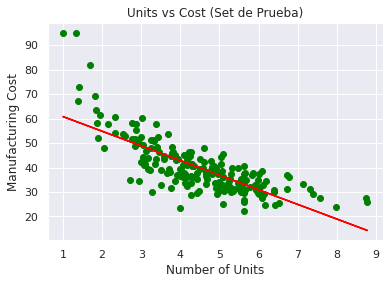

In [120]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred_test, color = 'red')
plt.title('Units vs Cost (Set de Prueba)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

In [121]:
#polinomial

### 3. Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [122]:
pol_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pol_features.fit_transform(X_train)

lr_ = LinearRegression(fit_intercept=True)
lr_.fit(X_poly, y_train)

X_test_poli = pol_features.fit_transform(X_test)

#realizamos las predicciones
y_pred_pt = lr_.predict(X_test_poli)


print("De la ecuación y = a1(x) + a2(x)^2 + b")
print("La pendiente a1 y el coeficiente a2 son:", lr_.coef_)
print("El término independiente 'b' es:", lr_.intercept_)

a1 = lr_.coef_[0]
a2 = lr_.coef_[1]
b = lr_.intercept_
print("La ecuación del modelo generado es: y =", a1,"(x) +", a2,"(x)^2 +", b) 

De la ecuación y = a1(x) + a2(x)^2 + b
La pendiente a1 y el coeficiente a2 son: [-16.32506746   1.12192589]
El término independiente 'b' es: 88.66103372689139
La ecuación del modelo generado es: y = -16.325067459116838 (x) + 1.121925894072367 (x)^2 + 88.66103372689139


In [123]:
orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_predictpoli=y_pred_pt[orden]

print("Resultados para el set de prueba")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_pt))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pt)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_pt))

Resultados para el set de prueba
Error medio Absoluto (MAE): 4.410633826931783
Raíz del Error Cuadrático Medio (RMSE): 5.9655858389751355
R-cuadrada del modelo: 0.7120302307125213


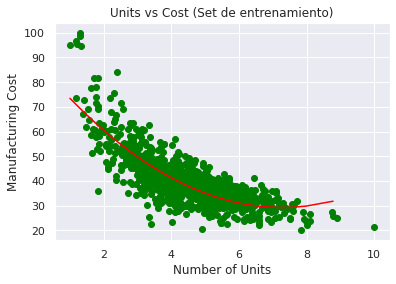

In [124]:
plt.scatter(X, y, color = 'green')
plt.plot(sortedXp, sorted_predictpoli, color = 'red')
plt.title('Units vs Cost (Set de entrenamiento)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.show()

###4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


####Ridge

In [125]:
ridge = Pipeline([('polinomial', PolynomialFeatures(degree=15, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('ridge', Ridge(alpha=10, random_state=42))])

ridge.fit(X_train, y_train)
y_pred_R = ridge.predict(X_test)

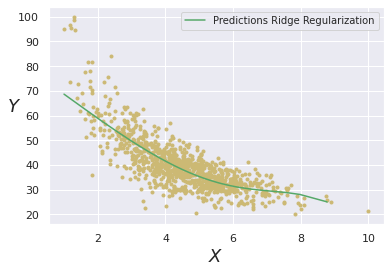

In [126]:
orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_ridge=y_pred_R[orden]

plt.plot(X,y,'y.')
plt.plot(sortedXp,sorted_ridge,'g-', label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=10);

In [127]:
ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X_train, y_train)
print('Coeficiente de Ridge es:',ridge.coef_)
print('Intercepción de Ridge es:',ridge.intercept_)

Coeficiente de Ridge es: [-5.93684843]
Intercepción de Ridge es: 66.61084865336575


In [128]:
print('Error medio Absoluto (MAE) de Ridge:', metrics.mean_absolute_error(y_test, y_pred_R))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_R))
print('Varianza: %.2f' % r2_score(y_test, y_pred_R))

Error medio Absoluto (MAE) de Ridge: 4.42587245277304
Raíz del Error Cuadrático Medio (RMSE): 6.155434649554569
R-cuadrada del modelo: 0.6934098838831282
Varianza: 0.69


####Lasso

In [129]:
model_lasso = Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('lasso', Lasso(alpha=0.01, random_state=42))])

model_lasso.fit(X_train, y_train)

y_pred_L = model_lasso.predict(X_test)

orden = np.argsort(X_test.values.ravel())
sortedXp = X_test.values.ravel()[orden]
sortedYp = y_test.values.ravel()[orden]
sorted_lasso=y_pred_pt[orden]

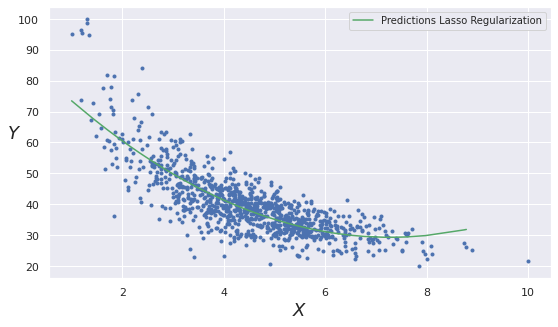

In [130]:
plt.figure(figsize=(9, 5))
plt.plot(X,y,'b.')
plt.plot(sortedXp,sorted_lasso, 'g-', label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=10);

In [131]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
print('Coeficiente del modelo Lasso es:',lasso.coef_)
print('Intercepción del modelo Lasso es:',lasso.intercept_)

Coeficiente del modelo Lasso es: [-5.97343051]
Intercepción del modelo Lasso es: 66.77449366040666


In [132]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(y_test, y_pred_L))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_L)))
print('R-cuadrada del modelo:', r2_score(y_test, y_pred_L))

Error medio Absoluto (MAE) del modelo: 4.407404185317766
Raíz del Error Cuadrático Medio (RMSE): 5.978080321202001
R-cuadrada del modelo: 0.7108227043539002


###4. Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)



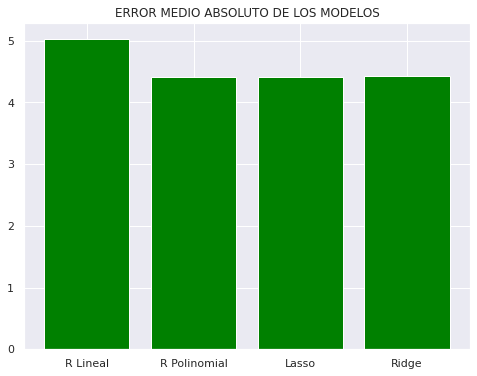

In [133]:
MAE_RL = metrics.mean_absolute_error(y_test, y_pred_test)
MAE_RP = metrics.mean_absolute_error(y_test, y_pred_pt)
MAE_LASSO =  metrics.mean_absolute_error(y_test, y_pred_L)
MAE_RIDGE =  metrics.mean_absolute_error(y_test, y_pred_R)
modelos = [MAE_RL,MAE_RP , MAE_LASSO,MAE_RIDGE]
nombres = ['R Lineal', 'R Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("ERROR MEDIO ABSOLUTO DE LOS MODELOS")
plt.bar(nombres, modelos, color='green')
plt.show()

In [134]:
print('MAE Regresión Lineal:',MAE_RL,'\nMAE Regresión Polinomial:',MAE_RP, '\nMAE Lasso:',MAE_LASSO, '\nMAE Ridge:',MAE_RIDGE)

MAE Regresión Lineal: 5.033403667160277 
MAE Regresión Polinomial: 4.410633826931783 
MAE Lasso: 4.407404185317766 
MAE Ridge: 4.42587245277304


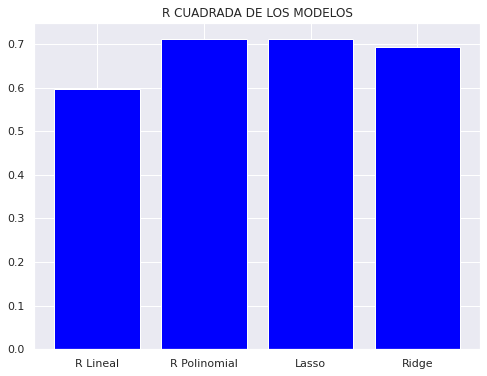

In [135]:
R2_RL = r2_score(y_test, y_pred_test)
R2_RP = r2_score(y_test, y_pred_pt)
R2_LASSO = r2_score(y_test, y_pred_L)
R2_RIDGE = r2_score(y_test, y_pred_R)

modelosr = [R2_RL,R2_RP ,R2_LASSO,R2_RIDGE]
nombres = ['R Lineal', 'R Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("R CUADRADA DE LOS MODELOS")
plt.bar(nombres, modelosr, color='blue')
plt.show()

In [136]:
print('R2 Regresión Lineal:',R2_RL,'\nR2 Regresión Polinomial:',R2_RP, '\nR2 Lasso:',R2_LASSO, '\nR2 Ridge:',R2_RIDGE)

R2 Regresión Lineal: 0.595798333672179 
R2 Regresión Polinomial: 0.7120302307125213 
R2 Lasso: 0.7108227043539002 
R2 Ridge: 0.6934098838831282




Explica tus resultados, que método conviene más a la empresa, ¿por que?, 
A la empresa le conviene usar el método polinómico, ya que es el modelo que mejor se ajusta a los datos y sus métricas mejoran, como lo muestran las gráficas.


¿que porcentajes de entrenamiento y evaluación usaste?, 
Se usaron el 80% para entrenamiento y el resto para prueba. Como siempre se usa una mayor cantidad para que los modelos se ajusten de manera correcta.

¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
Los errores que se tienen son aceptables,dado que la aplicación no es de alto riesgo. Sin embargo se puede notar que el MAE de todos los modelos menos el lineal fueron los menores y el R2 también fue muy bueno en estos modelos. 
La regresión polínomica es la que llega a tener las mejores métricas por tal motivo se selecciona.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [139]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [140]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


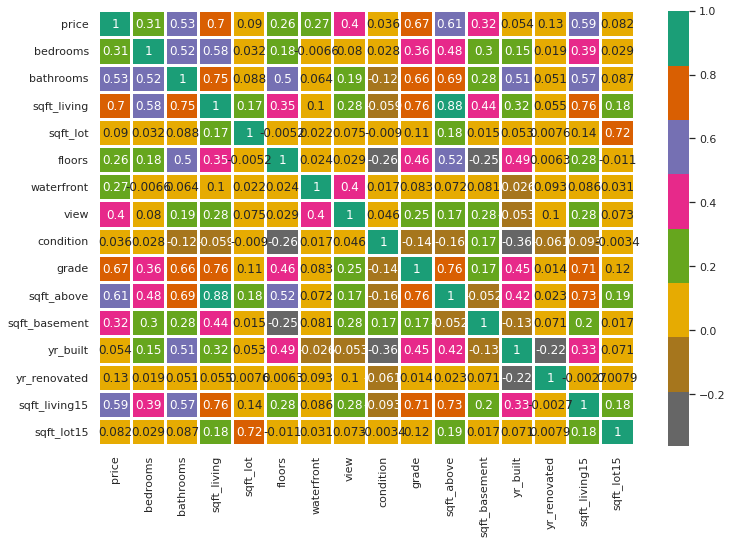

In [141]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [142]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [147]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


###Regresión multiple lineal

In [148]:
regresion_multiple = linear_model.LinearRegression(fit_intercept=True)
model = regresion_multiple.fit(Xtrain,ytrain) #entrenamos el modelo 
yhat = model.predict(Xtest)
print("Los coeficientes son:", list(zip(regresion_multiple.coef_)))
print("El término independiente 'b' es:", regresion_multiple.intercept_)

Los coeficientes son: [(array([-3.71022526e+04,  4.01418845e+04,  1.09169906e+02,  2.64378621e-02,
        2.95338523e+04,  5.52048615e+05,  4.22004055e+04,  2.21281704e+04,
        1.21117318e+05,  5.02818538e+01,  5.88880527e+01, -3.52812693e+03,
        1.04703799e+01,  2.60075557e+01, -5.66471373e-01]),)]
El término independiente 'b' es: [6093360.93532767]


Multiple Regression Equation

Price = 6093360.93 + (-3.710e+04 * bedrooms) + (4.0141e+04 * bathrooms) + ( 1.09169906e+02 * sqft_living) + (2.64378621e-02 * sqft_lot) + (2.95338523e+04 * floors) + (5.52048615e+05 * waterfront) + (4.22e+04 * view) + (2.2128e+04 * condition) + (1.211e+05 * grade) + (5.028e+01 * sqft_above) + (5.888e+01 * sqft_basement) + (-3.528e+03 * yr_built) + (1.047e+01 * yr_renovated) + (2.6e+01 *	sqft_living15) +	(-5.66e+01 * sqft_lot15) 

In [150]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, yhat))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, yhat)))
print('R-cuadrada del modelo:', r2_score(ytest, yhat))

Error medio Absoluto (MAE) del modelo: 136332.19435816686
Raíz del Error Cuadrático Medio (RMSE): 213832.57523968336
R-cuadrada del modelo: 0.6648546558345214


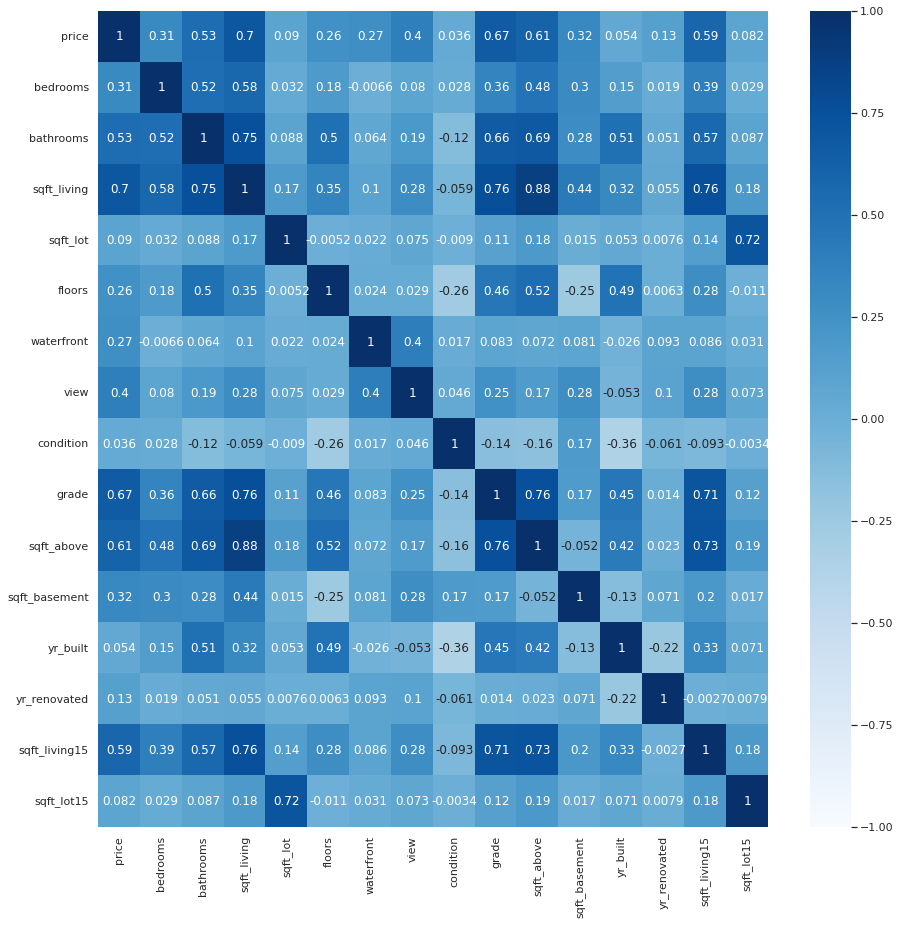

In [156]:
df.corr()
corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "Blues", annot= True)

Con el mapa de calor se aprecia qué sqft_lot y grade son de las variables qué mas contribuyen al precio (mayor correlación de Pearson)

###Regresión multiple Polinomial


In [158]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)
poly_x_values = poly_model.fit_transform(Xtrain)#entrenamiento 

regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(poly_x_values, ytrain)

poly_x_values_test = poly_model.fit_transform(Xtest)
y_poly_m = regression_model.predict(poly_x_values_test)

print("Los coeficientes son:", list(zip(regression_model.coef_)))
print("El término independiente 'b' es:", regression_model.intercept_)

Los coeficientes son: [(array([ 1.01546643e+06, -1.17473872e+06,  4.88877447e+03, -3.02395414e+01,
       -2.04113893e+06, -3.37343967e+06, -2.32409396e+05,  4.65228240e+05,
        1.03575786e+06, -5.71901219e+03, -5.83036698e+03, -8.62721107e+04,
       -2.97762923e+03,  4.11361563e+03, -3.44994320e+01,  8.42532473e+02,
        7.44046499e+03,  1.53881562e+02, -2.73170746e-02,  8.98401278e+03,
       -2.67097659e+03, -4.19493722e+03, -4.62336967e+03, -4.80525443e+03,
       -1.68414573e+02, -1.81484361e+02, -5.13025931e+02, -1.21183364e+01,
        1.97855035e+01,  2.08711018e-01, -8.69294429e+03,  3.34053775e+01,
       -1.45256220e-01, -2.65020503e+04,  2.37750838e+04,  6.61632205e+03,
       -2.61014961e+03,  2.02295957e+04, -4.11022577e+00, -2.26468112e+01,
        5.57330897e+02, -1.82081568e+01, -2.01555218e+01, -5.51449943e-02,
        1.56502048e+03, -2.10969718e+03,  2.56839387e+00,  1.44609372e+02,
       -1.24053695e+01,  1.37365954e+01,  2.38333770e+01, -2.54754462e+03,
 

In [159]:
print('Error medio Absoluto (MAE) :', metrics.mean_absolute_error(ytest, y_poly_m))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_poly_m)))
print('R-cuadrada del modelo:', r2_score(ytest, y_poly_m))

Error medio Absoluto (MAE) : 122015.80006144893
Raíz del Error Cuadrático Medio (RMSE): 181470.06574727758
R-cuadrada del modelo: 0.7586232413126757


###Lasso:


In [162]:
modelolasso= Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('lasso', Lasso(alpha=0.01, random_state=42))])


modelolasso.fit(Xtrain,ytrain)
y_pred_lasso = modelolasso.predict(Xtest)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.01, random_state=42)

In [163]:
print('Coeficiente del modelo Lasso es:',lasso.coef_)
print('Intercepción del modelo Lasso es:',lasso.intercept_)

Coeficiente del modelo Lasso es: [-3.71022399e+04  4.01418425e+04  2.97312642e+02  2.64377844e-02
  2.95338078e+04  5.52047149e+05  4.22004601e+04  2.21281435e+04
  1.21117305e+05 -1.37860837e+02 -1.29254666e+02 -3.52812643e+03
  1.04704061e+01  2.60075502e+01 -5.66471388e-01]
Intercepción del modelo Lasso es: [6093360.18325204]


In [164]:
print('Error medio Absoluto (MAE) del modelo:', metrics.mean_absolute_error(ytest, y_pred_lasso))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_pred_lasso)))
print('R-cuadrada del modelo:', r2_score(ytest, y_pred_lasso))

Error medio Absoluto (MAE) del modelo: 122937.44249018596
Raíz del Error Cuadrático Medio (RMSE): 183325.43265649356
R-cuadrada del modelo: 0.7536622926250723


###Ridge:

In [165]:
ridge= Pipeline([('polinomial', PolynomialFeatures(degree=2, include_bias=False)),
                        ('scaler', StandardScaler()), 
                        ('ridge', Ridge(alpha=10, random_state=42))])

In [166]:
ridge.fit(Xtrain,ytrain)
y_pred_ridge = ridge.predict(Xtest)

In [167]:
ridgem = Ridge(alpha=10, random_state=42)
ridgem.fit(Xtrain, ytrain)
print('Coeficiente del modelo Ridge es:',ridgem.coef_)
print('Intercepción del modelo Ridge es:',ridgem.intercept_)

Coeficiente del modelo Ridge es: [[-3.72834617e+04  3.99968523e+04  1.09368623e+02  2.41914350e-02
   2.95181032e+04  5.06949843e+05  4.42754441e+04  2.21944225e+04
   1.20908045e+05  5.06156426e+01  5.87531160e+01 -3.52440491e+03
   1.10708476e+01  2.58010214e+01 -5.64531304e-01]]
Intercepción del modelo Ridge es: [6087595.57156075]


In [170]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(ytest, y_pred_ridge))
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_pred_ridge)))
print('R-cuadrada del modelo:', r2_score(ytest, y_pred_ridge))

Error medio Absoluto (MAE): 122998.91347420678
Raíz del Error Cuadrático Medio (RMSE): 183517.94489484766
R-cuadrada del modelo: 0.7531446566103261


###Gráfica:

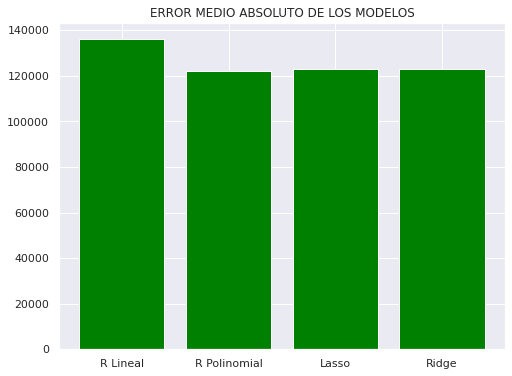

In [173]:
MAE_RL= metrics.mean_absolute_error(ytest, yhat)
MAE_POLI = metrics.mean_absolute_error(ytest, y_poly_m)
MAE_LASSO = metrics.mean_absolute_error(ytest, y_pred_lasso)
MAE_RIDGE = metrics.mean_absolute_error(ytest, y_pred_ridge)

modelos = [MAE_RL,MAE_POLI , MAE_LASSO,MAE_RIDGE]
nombres = ['R Lineal', 'R Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("ERROR MEDIO ABSOLUTO DE LOS MODELOS")
plt.bar(nombres, modelos, color='green')
plt.show()

In [174]:
print('MAE Regresión Lineal:',MAE_RL,'\nMAE Regresión Polinomial:',MAE_POLI, '\nMAE Lasso:',MAE_LASSO, '\nMAE Ridge:',MAE_RIDGE)

MAE Regresión Lineal: 136332.19435816686 
MAE Regresión Polinomial: 122015.80006144893 
MAE Lasso: 122937.44249018596 
MAE Ridge: 122998.91347420678


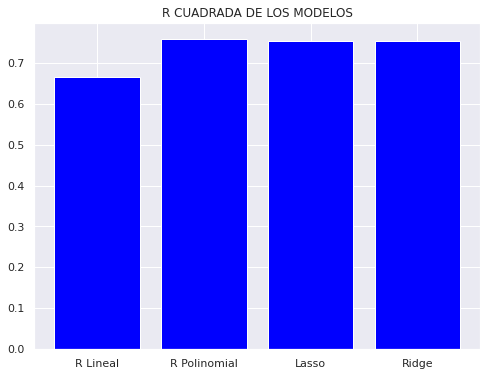

In [177]:
R2_RL = r2_score(ytest, yhat)
R2_POLI = r2_score(ytest, y_poly_m)
R2_LASSO = r2_score(ytest, y_pred_lasso)
R2_RIDGE = r2_score(ytest, y_pred_ridge)

modelosr = [R2_RL,R2_POLI ,R2_LASSO,R2_RIDGE]
nombres = ['R Lineal', 'R Polinomial', 'Lasso', 'Ridge']
sns.set(rc={'figure.figsize':(8,6)})
plt.title("R CUADRADA DE LOS MODELOS")
plt.bar(nombres, modelosr, color='blue')
plt.show()

In [178]:
print('R2 Regresión Lineal:',R2_RL,'\nR2 Regresión Polinomial:',R2_POLI, '\nR2 Lasso:',R2_LASSO, '\nR2 Ridge:',R2_RIDGE)

R2 Regresión Lineal: 0.6648546558345214 
R2 Regresión Polinomial: 0.7586232413126757 
R2 Lasso: 0.7536622926250723 
R2 Ridge: 0.7531446566103261


Explica tus resultados, que método se aproxima mejor, ¿por qué?, 
Una vez más los modelos no lineales se ajustan de una mejor manera a los datos,dado que ellos son los que tienen más flexibilidad para "seguir" a la información.
En este caso se elije el modelo polinomial ya que contiene las mejores métricas.

¿qué porcentajes de entrenamiento y evaluación usaste? 
80% Entrenamiento y 20% Prueba


¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?
Las R2 de modelos no lineales mostraron valores alrededor del .75 lo cual hace a estos modelos satisfactorios para esta aplicación. 